In [1]:
# 📌 Step 0: Importing Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
# 📌 Step 1: Load the Dataset
df = pd.read_csv('/content/Housing.csv')  # Replace path if needed
df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
# 📌 Step 2: Basic Info & Summary
print("Shape of Dataset:", df.shape)
print("\nColumn Names:\n", df.columns.tolist())
print("\nData Types:\n")
print(df.dtypes)

print("\nSummary Statistics:\n")
print(df.describe(include='all'))


Shape of Dataset: (545, 13)

Column Names:
 ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']

Data Types:

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

Summary Statistics:

               price          area    bedrooms   bathrooms     stories  \
count   5.450000e+02    545.000000  545.000000  545.000000  545.000000   
unique           NaN           NaN         NaN         NaN         NaN   
top              NaN           NaN         NaN         NaN         NaN   
freq             NaN           NaN         NaN         NaN         NaN   
mean    4.766

In [4]:
# 📌 Step 3: Check for Missing Values
print("Missing Values:\n")
print(df.isnull().sum())


Missing Values:

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [5]:
# 📌 Step 4: Data Cleaning (if needed)
# Convert 'yes'/'no' to 1/0 for binary columns
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for col in binary_cols:
    df[col] = df[col].map({'yes': 1, 'no': 0})

# Convert 'furnishingstatus' to numeric using one-hot encoding
df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True)

df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,False,False
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,False,False
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,True,False
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,False,False
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,False,False


In [13]:
  # 📌 Step 5: Pivot Tables

# Example 1: Average price by air conditioning
pivot1 = pd.pivot_table(df, values='price', index='airconditioning', aggfunc='mean')
print("Average price by Air Conditioning:\n")
print(pivot1)

# Example 2: Average price by number of bedrooms
pivot2 = pd.pivot_table(df, values='price', index='bedrooms', aggfunc='mean')
print("\nAverage price by Number of Bedrooms:\n")
print(pivot2)

# Example 3: Average price by number of bathrooms and furnishingstatus
pivot3 = pd.pivot_table(df, values='price', index='bathrooms', columns=['furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished'], aggfunc='mean', fill_value=0)
print("\nAverage price by Bathrooms and Furnishing Status:\n")
print(pivot3)


Average price by Air Conditioning:

                        price
airconditioning              
0                4.191940e+06
1                6.013221e+06

Average price by Number of Bedrooms:

                 price
bedrooms              
1         2.712500e+06
2         3.632022e+06
3         4.954598e+06
4         5.729758e+06
5         5.819800e+06
6         4.791500e+06

Average price by Bathrooms and Furnishing Status:

furnishingstatus_semi-furnished         False                       True 
furnishingstatus_unfurnished            False         True          False
bathrooms                                                                
1                                4.787106e+06  3.571333e+06  4.458210e+06
2                                6.663915e+06  6.017000e+06  5.920711e+06
3                                6.440000e+06  7.000000e+06  7.563500e+06
4                                1.225000e+07  0.000000e+00  0.000000e+00


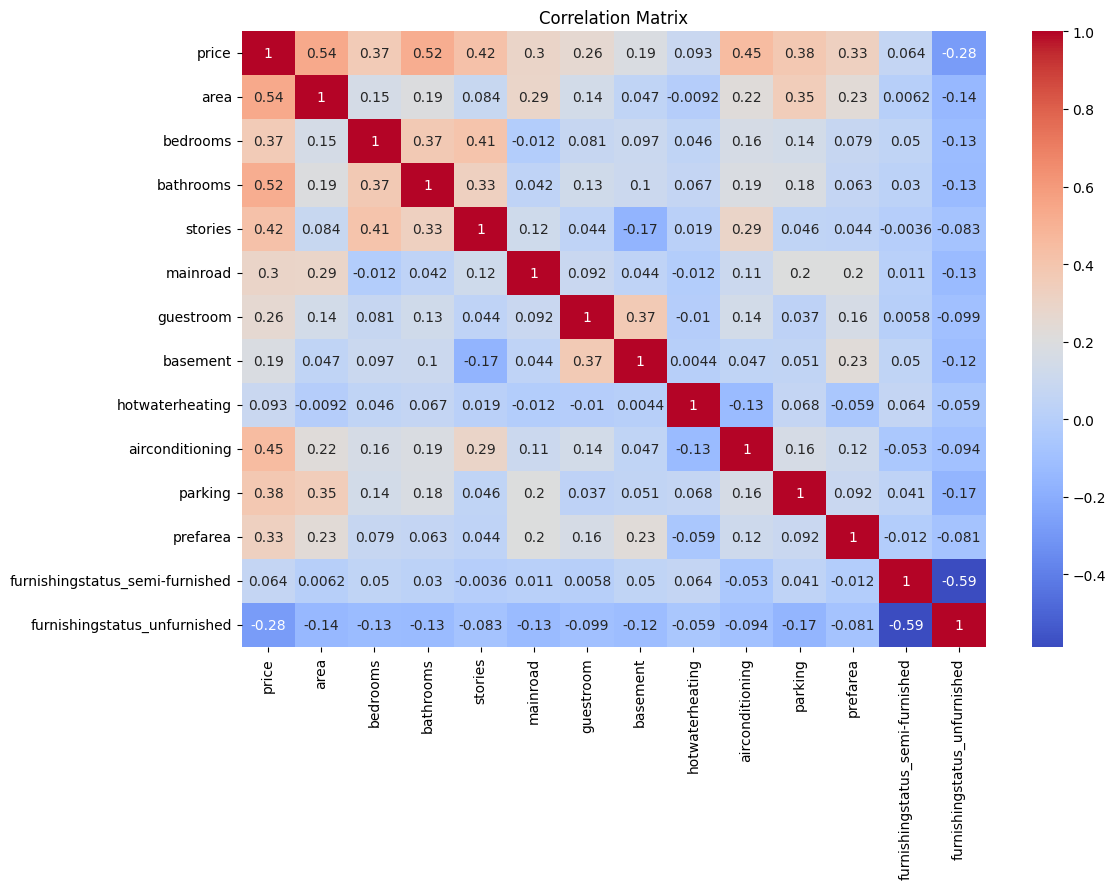

In [6]:
# 📌 Step 6: Correlation Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


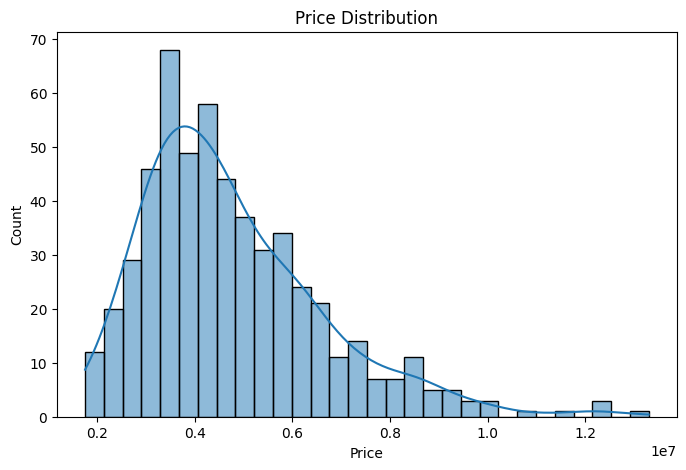

In [7]:
# 📌 Step 7: Visualizations

# Distribution of price
plt.figure(figsize=(8, 5))
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()


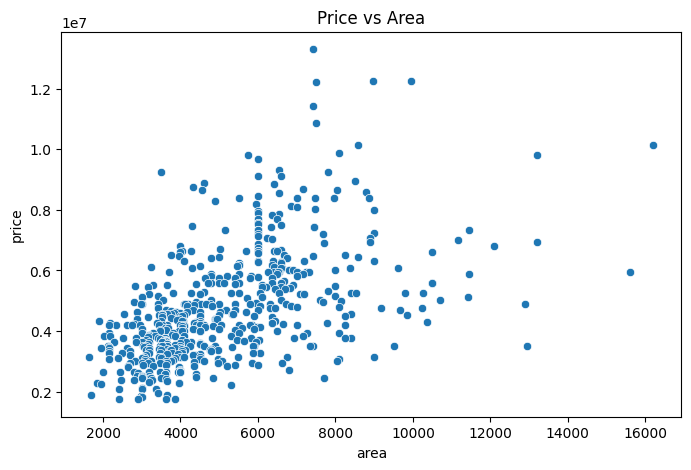

In [8]:
# Scatter plot: Price vs Area
plt.figure(figsize=(8, 5))
sns.scatterplot(x='area', y='price', data=df)
plt.title('Price vs Area')
plt.show()


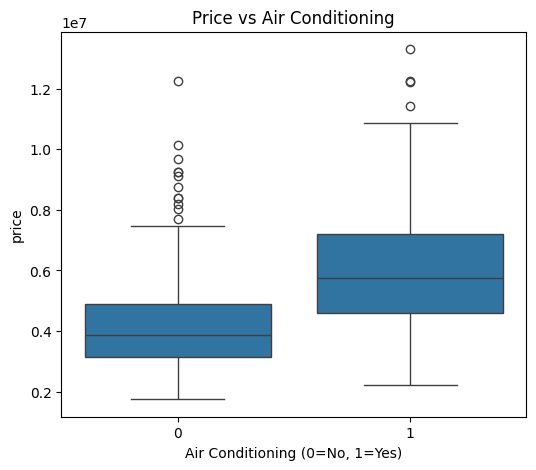

In [9]:
# Box plot for price vs air conditioning
plt.figure(figsize=(6, 5))
sns.boxplot(x='airconditioning', y='price', data=df)
plt.title('Price vs Air Conditioning')
plt.xlabel('Air Conditioning (0=No, 1=Yes)')
plt.show()


In [10]:
# 📌 Step 8: Feature Selection (Based on Correlation)
corr_with_price = df.corr()['price'].sort_values(ascending=False)
print("Top correlated features with price:\n")
print(corr_with_price)


Top correlated features with price:

price                              1.000000
area                               0.535997
bathrooms                          0.517545
airconditioning                    0.452954
stories                            0.420712
parking                            0.384394
bedrooms                           0.366494
prefarea                           0.329777
mainroad                           0.296898
guestroom                          0.255517
basement                           0.187057
hotwaterheating                    0.093073
furnishingstatus_semi-furnished    0.063656
furnishingstatus_unfurnished      -0.280587
Name: price, dtype: float64


In [11]:
# 📌 Step 9: Model Building (Linear Regression)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define features and target
X = df.drop('price', axis=1)
y = df['price']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation
print("R² Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))


R² Score: 0.6529242642153185
MSE: 1754318687330.6633


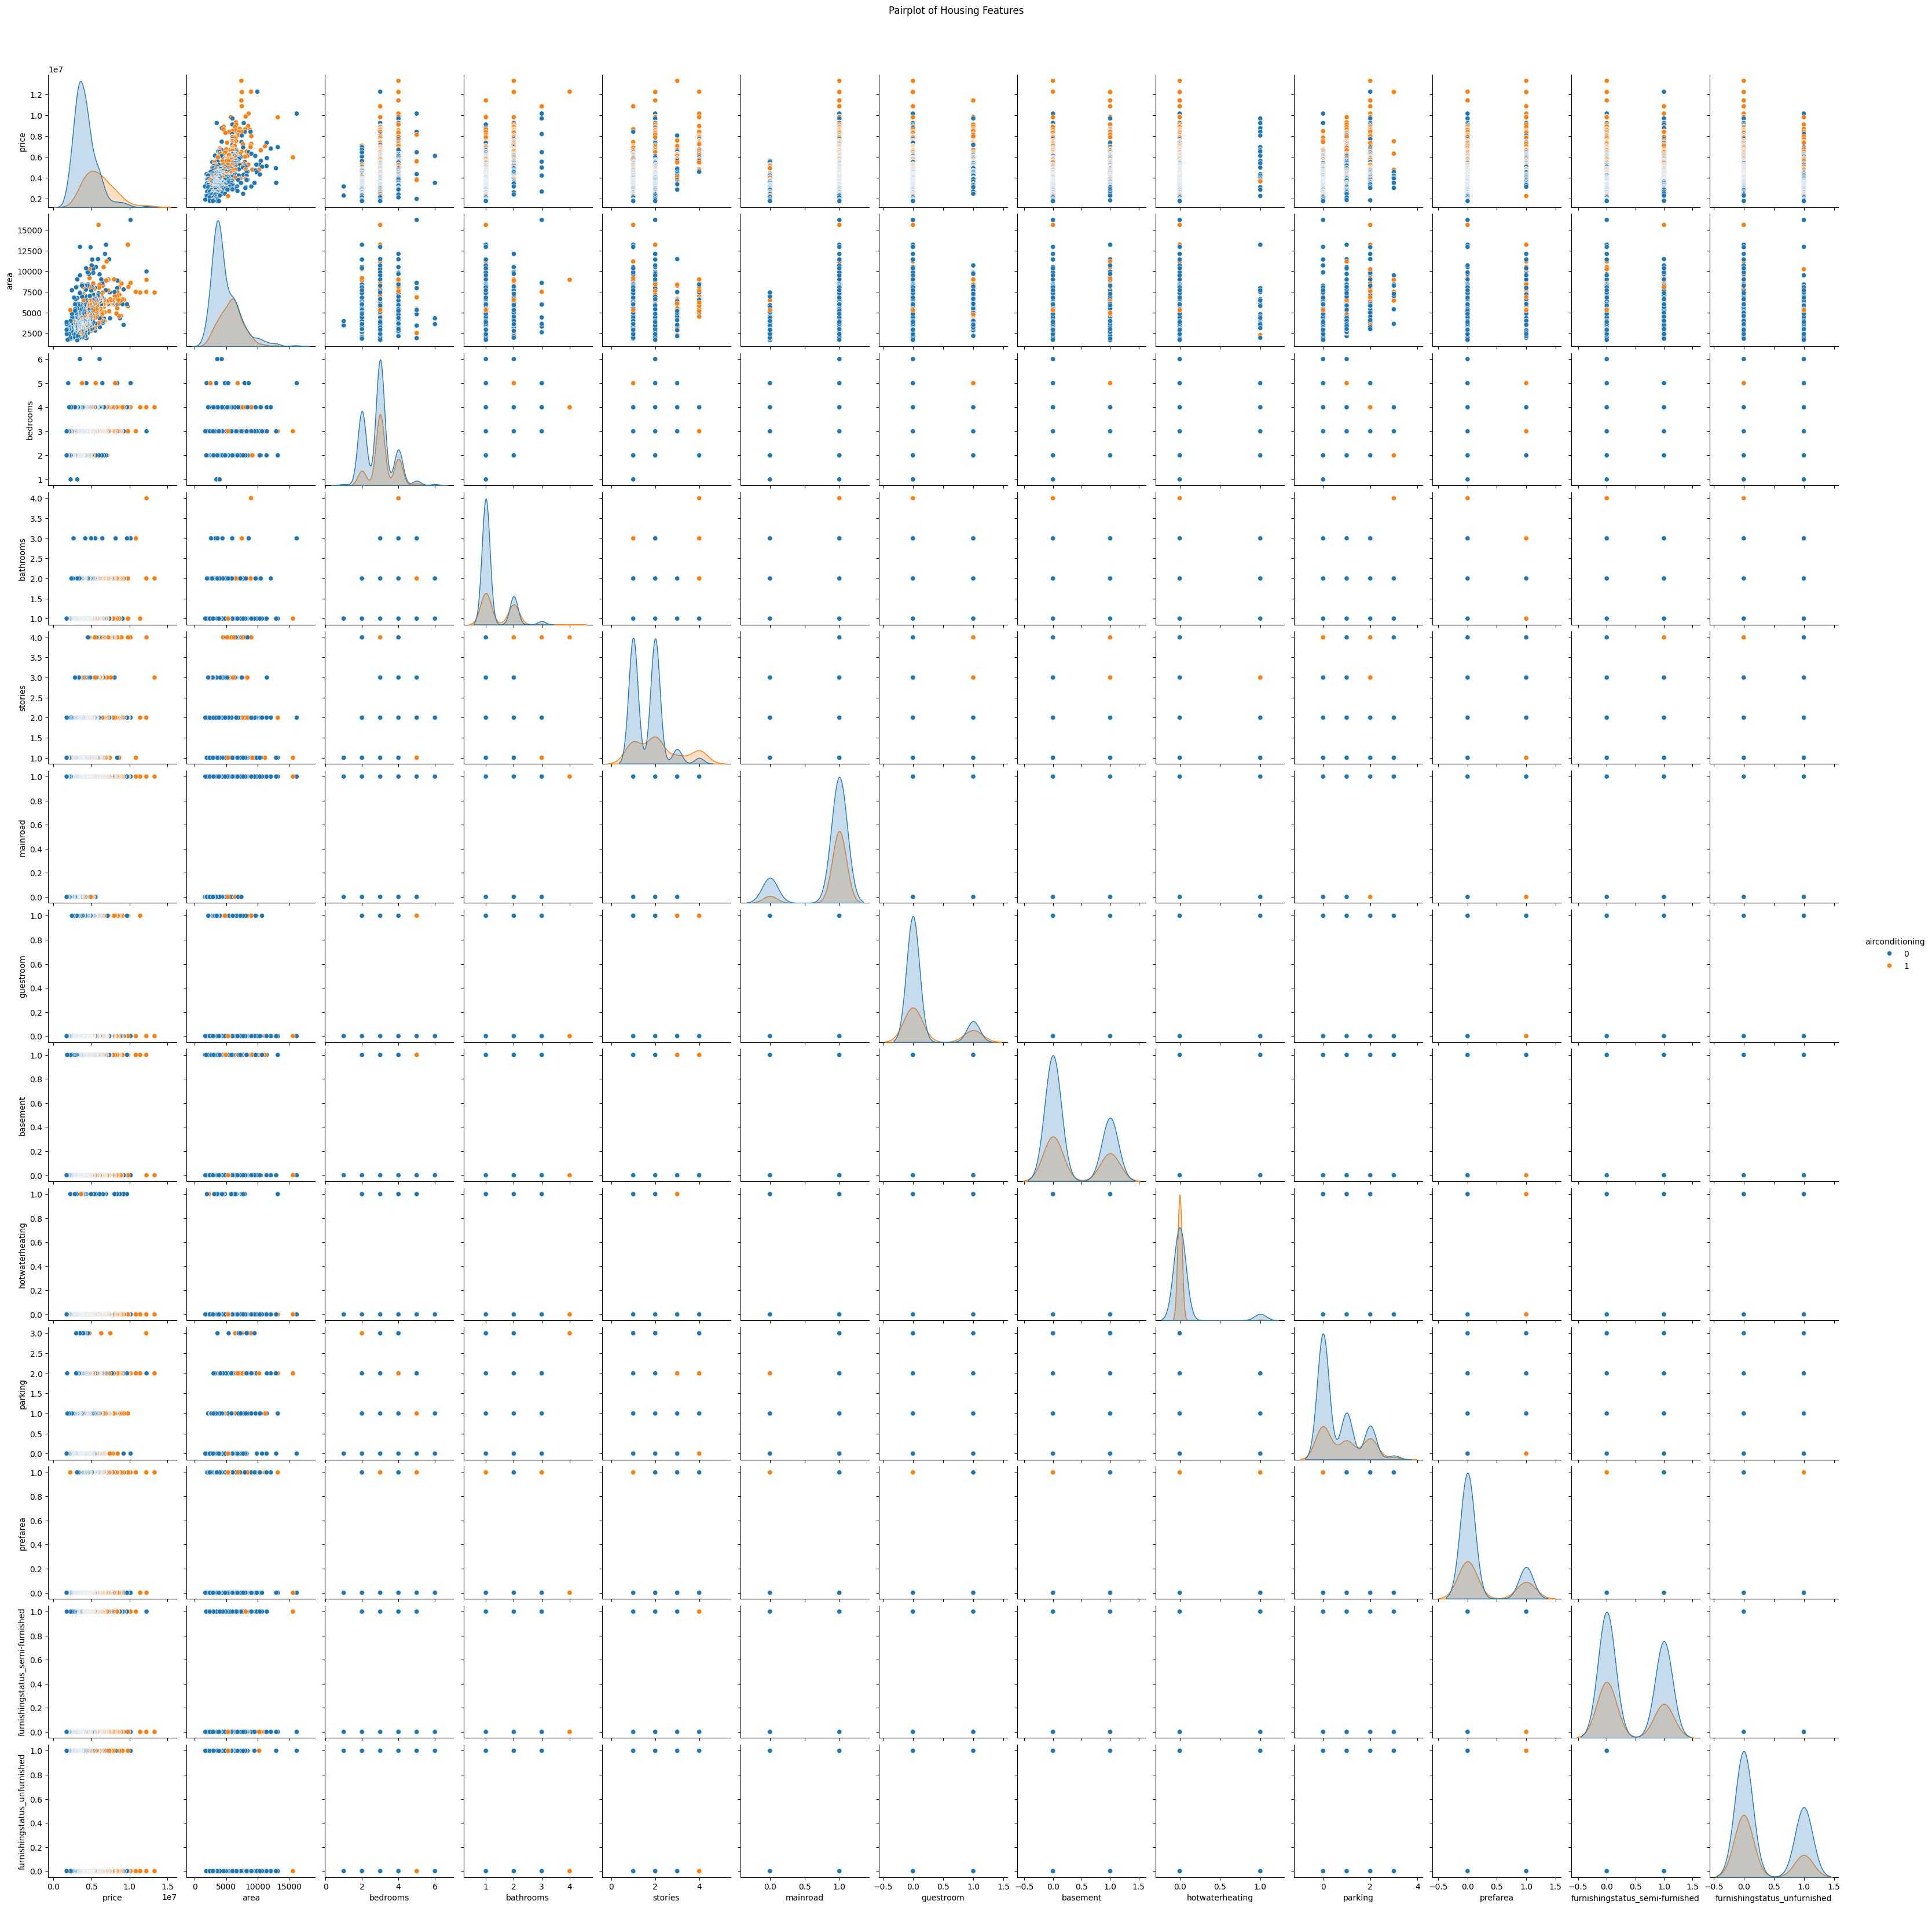

In [14]:
# 📌 Step 10: Additional Visualizations

# 1. Pairplot to visualize relationships between numerical features
sns.pairplot(df, hue='airconditioning', diag_kind='kde', height=2.5)
plt.suptitle('Pairplot of Housing Features', y=1.02)
plt.show()


<ipython-input-15-69e9a8003f4e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='airconditioning', data=df, palette='Set2')


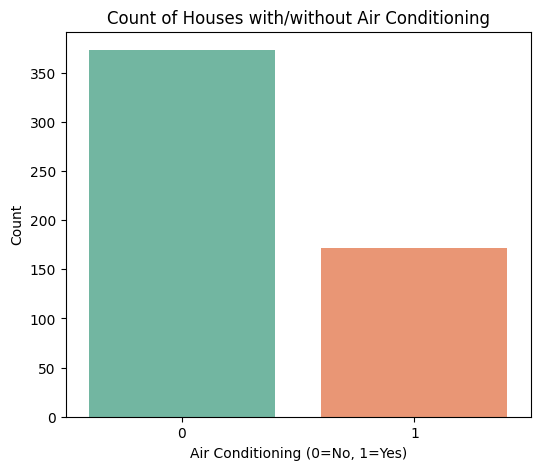

In [ ]:
# 11. Count plot for categorical variable: Air Conditioning
plt.figure(figsize=(6, 5))
sns.countplot(x='airconditioning', data=df, hue='airconditioning', palette='Set2', legend=False)
plt.title('Count of Houses with/without Air Conditioning')
plt.xlabel('Air Conditioning (0=No, 1=Yes)')
plt.ylabel('Count')
plt.show()


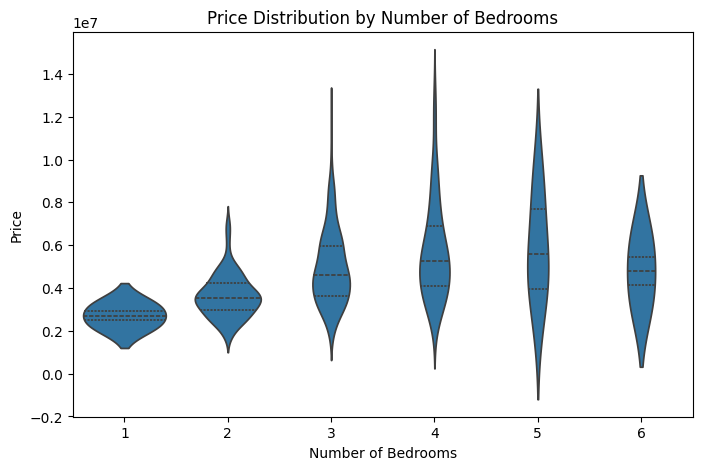

In [18]:
# 12. Violin plot for price by number of bedrooms
plt.figure(figsize=(8, 5))
sns.violinplot(x='bedrooms', y='price', data=df, inner='quart')
plt.title('Price Distribution by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.show()




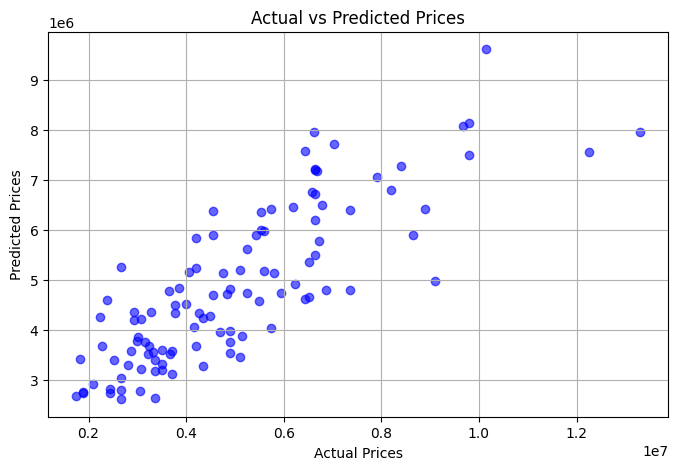

In [12]:
# 📌 Step 13: Plotting Actual vs Predicted Prices
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.grid(True)
plt.show()
